<a href="https://colab.research.google.com/github/em-kagereki/task2/blob/manin/EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory data analysis**


### Objective

<hr>

1. Load libraries and setup
2. Load data
3. Data overview:each of the dataset will be assessed individually.

*   Summary statistics
*   Visualization

3. Assess and correct any issues with the quality of data:

*   Accuracy
  - Do the data have the expected values.
  - Skewed values
*   Completeness
  - Check missngness.
*   Consistency
  - Any obvious discrepancy
*   Currency
  - Run a check on the dates. 
*   Relevance
  - Check for data with no meaningful meta-data
*   Validity
  - Check if data contains allowable values.
*   Uniquesness
  - Duplicates.

4. Data joins

5. Assess some associations.


<hr>

In [64]:
import seaborn as sns
import matplotlib.pyplot as mat
import pandas as pd
import sklearn as sk
import numpy as nu
import pickle
import os
from statsmodels.graphics.mosaicplot import mosaic

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [274]:
## Data over view  - History data
hist = pd.read_csv('ml_case_training_hist_data.csv',parse_dates=True)  
clientProfile = pd.read_csv('ml_case_training_data.csv',parse_dates=True)  
outcome = pd.read_csv('ml_case_training_output.csv')  


# Historical pricing data

In [66]:
hist.head()
hist.tail()


,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [67]:
hist.shape

(193002, 8)

In [68]:
hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [69]:
hist.nunique()

id              16096
price_date         12
price_p1_var     1853
price_p2_var     1189
price_p3_var      711
price_p1_fix       69
price_p2_fix       33
price_p3_fix       30
dtype: int64

Important points

*   A total of 191643 records with 16096 unique IDs.
*   Each consumer had the reading done in multiple days.
*   Negative measurements for the price_p1_fix and price_p2_fix minimum values. This could be a possible typo




Accuracy

In [70]:
# We first need to transform the date.
# Then check for the data-types.
# Then check for the outliers

format = '%Y-%m-%d'
hist['price_date'] = pd.to_datetime(hist['price_date'] , format=format)
hist = hist.set_index(pd.DatetimeIndex(hist['price_date']))

In [71]:
hist.dtypes

id                      object
price_date      datetime64[ns]
price_p1_var           float64
price_p2_var           float64
price_p3_var           float64
price_p1_fix           float64
price_p2_fix           float64
price_p3_fix           float64
dtype: object

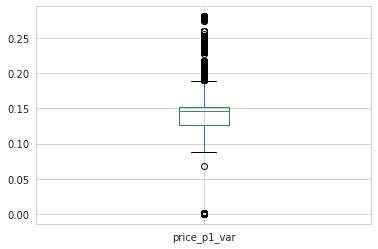

In [72]:
boxplot = hist.boxplot(column=['price_p1_var'])

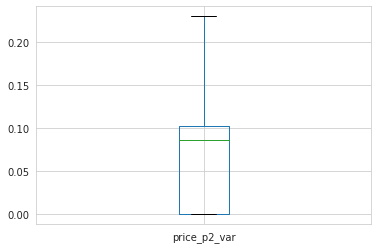

In [73]:
boxplot = hist.boxplot(column=['price_p2_var'])

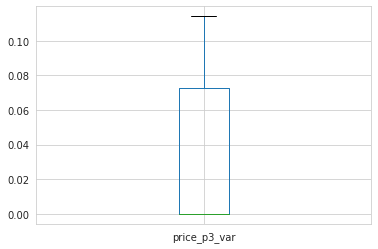

In [74]:
boxplot = hist.boxplot(column=['price_p3_var'])

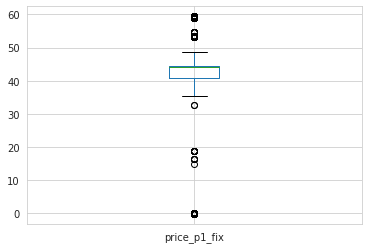

In [75]:
boxplot = hist.boxplot(column=['price_p1_fix'])

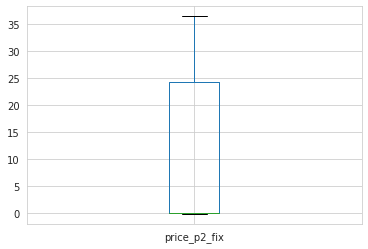

In [76]:
boxplot = hist.boxplot(column=['price_p2_fix'])

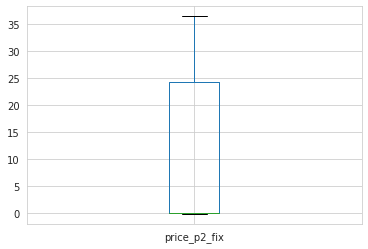

In [77]:
boxplot = hist.boxplot(column=['price_p2_fix'])

In [78]:
hist.price_date.min()

Timestamp('2015-01-01 00:00:00')

In [79]:
hist.price_date.max()

Timestamp('2015-12-01 00:00:00')

Summary on the accuracy of Historical pricing data accuracy data:



1.   Timeline is between 2015-01-01 to 2015-12-01. This is 11 months on data, with no unrealistic dates.
2.   There are obvious  outliers with "price_p1_fix" and  "price_p1_var" values

The outliers will be managed in the pre-prosessing step.




Missing data

In [80]:
hist.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [81]:
missing = hist[hist.isnull().any(axis=1)]
missing.head(10)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
price_date,,,,,,,,
2015-04-01,ef716222bbd97a8bdfcbb831e3575560,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01,0f5231100b2febab862f8dd8eaab3f43,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01,2f93639de582fadfbe3e86ce1c8d8f35,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01,f83c1ab1ca1d1802bb1df4d72820243c,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01,3076c6d4a060e12a049d1700d9b09cf3,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,33bb3af90650ac2e9ecac6ff2c975a6b,2015-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-01,33bb3af90650ac2e9ecac6ff2c975a6b,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,33bb3af90650ac2e9ecac6ff2c975a6b,2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-01,33bb3af90650ac2e9ecac6ff2c975a6b,2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
missing.price_date.min()

Timestamp('2015-01-01 00:00:00')

In [83]:
missing.price_date.max()

Timestamp('2015-12-01 00:00:00')

In [84]:
missing.shape

(1359, 8)

In [85]:
missing.id.nunique()

1207

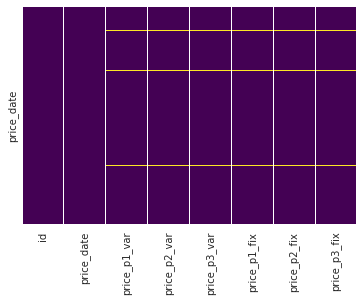

In [86]:
sns.heatmap(hist.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Summary on the missingness of this data:



*   From the heatmap, all the price values were missing with the dates present.
*   135 entries were missing from 1207 customers. This prbably indicates that there were some days that the prices were not generated.

This means that it is safe to impute the values based on the time. That will be done below



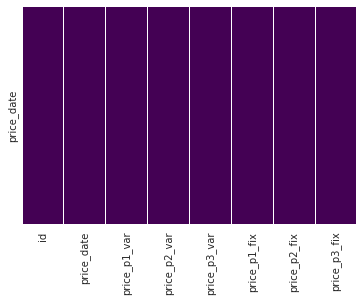

In [87]:
# Impute the missing values

hist = hist.interpolate(method="time")
sns.heatmap(hist.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [88]:
len(hist)-len(hist.drop_duplicates())

0

There were no other potential threats to the quality of this dataset. 






---













**The churn data**

In [89]:
outcome = pd.read_csv('ml_case_training_output.csv')  
outcome.shape

(16096, 2)

In [90]:
outcome.head()
outcome.tail()

,id,churn
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0
16095,563dde550fd624d7352f3de77c0cdfcd,0


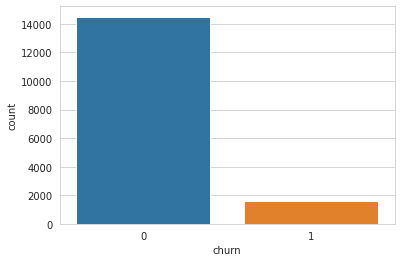

In [91]:
## Here we will get a Pie with percentages
sns.set_style('whitegrid')
sns.countplot(x="churn",data=outcome)

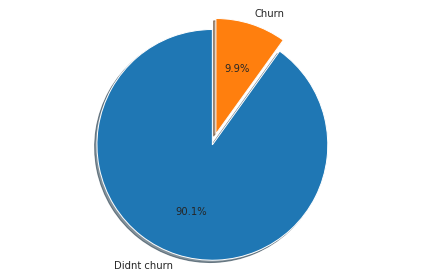

In [131]:

# Pie chart
labels = ['Didnt churn', 'Churn']
sizes = [len(outcome[outcome['churn'] == 0]), len(outcome[outcome['churn'] == 1])]
explode = (0, 0.1)  
fig1, ax1 = mat.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
mat.tight_layout()
mat.show()

In [92]:

# Check the number of duplicates
len(outcome)-len(outcome.drop_duplicates())

0

In [93]:
#Set index
outcome.set_index(['id'])
outcome.nunique()

id       16096
churn        2
dtype: int64

Summary of the dataset:



*   A total of 16096 records, one for each unique customer.
*   No duplicates or missing data.
*   Only a small amount had churned (x%).




# Factors in the Historical pricing data associated with churn phenomenon

In [202]:
merge1 = pd.merge(left=hist, right=outcome, how='left', on='id')
merge1.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0


In [203]:
outcome.columns

Index(['id', 'churn'], dtype='object')

Temporal distribution of churn

In [ ]:

#outcome.set_index(['id'])
time = merge1[['price_date','churn']]
#time['month'] = ([time['price_date'].dt.month])
chur = time[time["churn"] == 1]

chur = chur.groupby([time['price_date'].dt.month]).count()
chur.reset_index(drop=True, inplace=True)
chur = chur.rename(columns={'churn': 'Churned'})

noChur = time[time["churn"] == 0]

noChur = noChur.groupby([time['price_date'].dt.month]).count()

noChur.reset_index(drop=True, inplace=True)
noChur = noChur.rename(columns={'churn': 'Didnt'})

In [221]:

data = {'Month':["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],'Didnt': noChur['Didnt'], 'Churned': chur['Churned']}  
  
# Create DataFrame  
df = pd.DataFrame(data) 
df["ChurnPer"] = (df['Churned'] / (df['Didnt']+df['Churned']) * 100)
df["DidntPer"] = (df['Didnt'] / (df['Didnt']+df['Churned']) * 100)

df

,Month,Didnt,Churned,ChurnPer,DidntPer
0,Jan,14478,1592,9.906658,90.093342
1,Feb,14489,1593,9.905484,90.094516
2,Mar,14483,1591,9.897972,90.102028
3,Apr,14487,1592,9.901113,90.098887
4,May,14490,1590,9.888060,90.111940
5,Jun,14493,1592,9.897420,90.102580
6,Jul,14497,1593,9.900559,90.099441
7,Aug,14499,1595,9.910526,90.089474
8,Sep,14492,1590,9.886830,90.113170
9,Oct,14493,1592,9.897420,90.102580


Impression: There was no seasonality in the churn effect

In [222]:
merge1.columns

Index(['id', 'price_date', 'price_p1_var', 'price_p2_var', 'price_p3_var',
       'price_p1_fix', 'price_p2_fix', 'price_p3_fix', 'churn'],
      dtype='object')

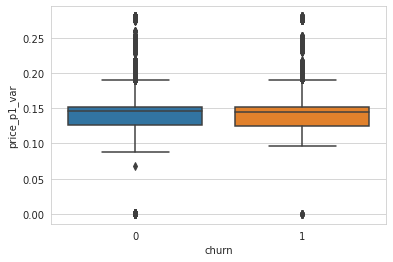

In [242]:
sns.boxplot(x="churn", y="price_p1_var", data=merge1)


In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.boxplot(x="churn", y="price_p2_var", data=merge1, ax=axs[0])
sns.boxplot(x="churn", y="price_p1_var", data=merge1, ax=axs[1])
f.tight_layout()

In [ ]:
ax = sns.boxplot(x="churn", y="price_p3_var", data=merge1)


In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.boxplot(x="churn", y="price_p1_fix", data=merge1, ax=axs[0])
sns.boxplot(x="churn", y="price_p2_fix", data=merge1, ax=axs[1])
f.tight_layout()

In [ ]:
ax = sns.boxplot(x="churn", y="price_p3_fix", data=merge1)


Impression: Comparing these boxplots, there is no obvious difference in the prices amongst those who churned and those who didnt

**The Historical customer data**

In [250]:
clientProfile.shape

(16096, 25)

In [ ]:
clientProfile.dtypes

In [ ]:
clientProfile.head()
clientProfile.tail()

In [253]:
clientProfile.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


**Missing data**

In [254]:
## Check and deal with missing!
## Eyes on the important data points
clientProfile.isnull().sum()

id                             0
channel_sales               4218
cons_12m                       0
cons_gas_12m                   0
cons_last_month                0
date_activ                     0
date_end                       2
date_modif_prod              157
date_renewal                  40
forecast_cons_12m              0
forecast_cons_year             0
forecast_discount_energy     126
forecast_meter_rent_12m        0
forecast_price_energy_p1     126
forecast_price_energy_p2     126
forecast_price_pow_p1        126
has_gas                        0
imp_cons                       0
margin_gross_pow_ele          13
margin_net_pow_ele            13
nb_prod_act                    0
net_margin                    15
num_years_antig                0
origin_up                     87
pow_max                        3
dtype: int64

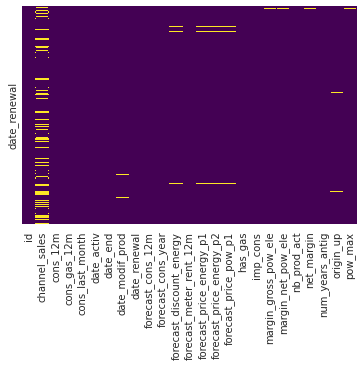

In [255]:
sns.heatmap(clientProfile.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
pd.DataFrame({"Missing values (%)": clientProfile.isnull().sum()/len(clientProfile.index)*100})


Variable  with 50% or more of missing values to be exluded from further analysis.

*   forecast_base_bill_ele
*   forecast_base_bill_year
*   forecast_bill_12m
*   forecast_cons
*   date_first_activ
*   campaign_disc_ele
*   activity_new           


The rest of the missing data will be taken care of during the preprocessing.

**NB** This is because no logic for interpolation of the data can be made out at this point!



In [276]:


clientProfile = clientProfile.drop(columns=["forecast_base_bill_ele","forecast_base_bill_year","forecast_bill_12m","forecast_cons","date_first_activ","campaign_disc_ele","activity_new"])



Duplicates

In [257]:
# Set index
# Check the number of duplicates
clientProfile.set_index(['id'])
len(clientProfile)-len(clientProfile.drop_duplicates())

0

Currency of the data: Check the date values

In [259]:
format = '%Y-%m-%d'
clientProfile['date_activ'] = pd.to_datetime(clientProfile['date_activ'] , format=format)
clientProfile = clientProfile.set_index(pd.DatetimeIndex(clientProfile['date_activ']))

In [260]:
clientProfile.date_activ.max()

Timestamp('2014-09-01 00:00:00')

In [261]:
clientProfile.date_activ.min()

Timestamp('2000-07-25 00:00:00')

In [262]:
format = '%Y-%m-%d'
clientProfile['date_end'] = pd.to_datetime(clientProfile['date_end'] , format=format)
clientProfile = clientProfile.set_index(pd.DatetimeIndex(clientProfile['date_end']))

In [264]:
clientProfile.date_end.min()

Timestamp('2006-08-26 00:00:00')

In [263]:
clientProfile.date_end.max()

Timestamp('2017-06-13 00:00:00')

In [265]:
format = '%Y-%m-%d'
clientProfile['date_renewal'] = pd.to_datetime(clientProfile['date_renewal'] , format=format)
clientProfile = clientProfile.set_index(pd.DatetimeIndex(clientProfile['date_renewal']))

In [266]:
clientProfile.date_renewal.min()

Timestamp('2013-06-26 00:00:00')

In [267]:
clientProfile.date_renewal.max()

Timestamp('2016-01-28 00:00:00')

In [286]:
clientProfile.dtypes

id                           object
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_modif_prod              object
date_renewal                 object
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int64
net_margin                  float64
num_years_antig               int64
origin_up                    object
pow_max                     float64
dtype: object

In [284]:
clientProfile.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


# Then we check associations in the Historical customer data 

In [277]:
merge2 = pd.merge(left=clientProfile, right=outcome, how='left', on='id')
merge2.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [290]:
merge2.dtypes

id                           object
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_modif_prod              object
date_renewal                 object
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int64
net_margin                  float64
num_years_antig               int64
origin_up                    object
pow_max                     float64
churn                         int64
dtype: object

# Association between Consumption and churn effect

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.boxplot(x="churn", y="cons_12m", data=merge2, ax=axs[0])
sns.boxplot(x="churn", y="cons_gas_12m", data=merge2, ax=axs[1])
f.tight_layout()

In [ ]:
ax = sns.boxplot(x="churn", y="cons_last_month", data=merge2)


From the box plots above, the  means for the consumption seem to be the same, but a few of the  customers who did not churn seem to have quite high figures!






# Association between projected consumption and churn effect

In [ ]:
ax = sns.boxplot(x="churn", y="forecast_discount_energy", data=merge2)


In [ ]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.boxplot(x="churn", y="forecast_cons_12m", data=merge2, ax=axs[0])
sns.boxplot(x="churn", y="forecast_cons_year", data=merge2, ax=axs[1])
f.tight_layout()

From the box plots above, the  means for the forecasted consumption  seem to be similar, but a few of the  customers who did not churn seem to have quite high figures!

Association between the projected cost and the churn effect

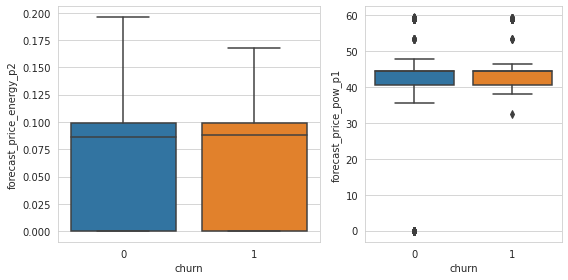

In [296]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.boxplot(x="churn", y="forecast_price_energy_p2", data=merge2, ax=axs[0])
sns.boxplot(x="churn", y="forecast_price_pow_p1", data=merge2, ax=axs[1])
f.tight_layout()

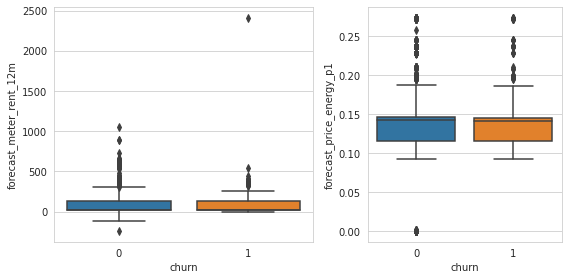

In [297]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.boxplot(x="churn", y="forecast_meter_rent_12m", data=merge2, ax=axs[0])
sns.boxplot(x="churn", y="forecast_price_energy_p1", data=merge2, ax=axs[1])
f.tight_layout()

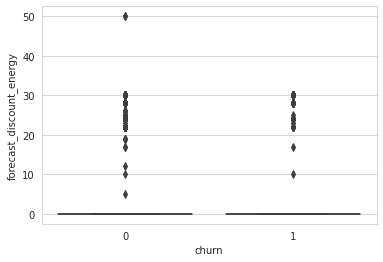

In [298]:
ax = sns.boxplot(x="churn", y="forecast_discount_energy", data=merge2)


Impression: No obvious difference!

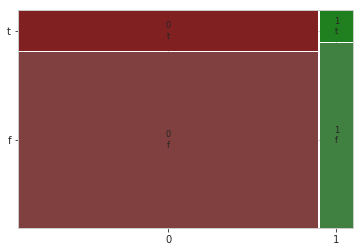

In [307]:
thisPlot = merge2[["id","churn","has_gas"]] 
mosaic(thisPlot, ['churn','has_gas'])
plt.show()

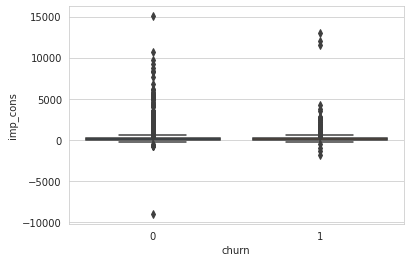

In [309]:
sns.boxplot(x="churn", y="imp_cons", data=merge2)


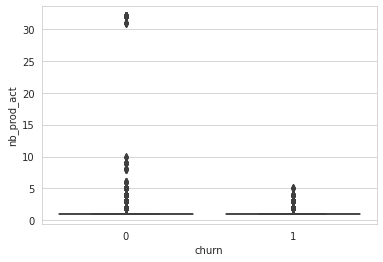

In [310]:
sns.boxplot(x="churn", y="nb_prod_act", data=merge2)


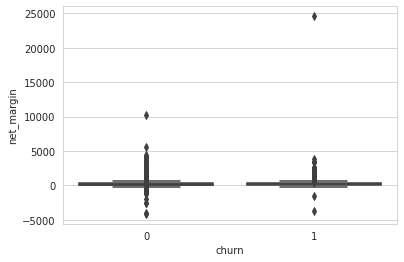

In [311]:
sns.boxplot(x="churn", y="net_margin", data=merge2)


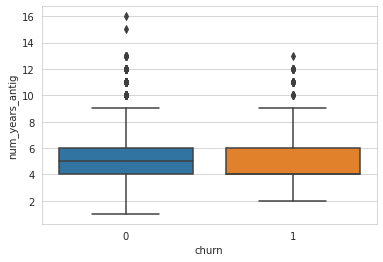

In [313]:
sns.boxplot(x="churn", y="num_years_antig", data=merge2)


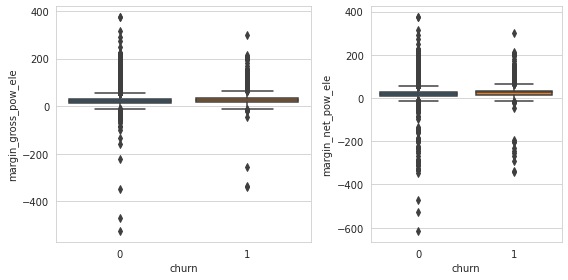

In [308]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.boxplot(x="churn", y="margin_gross_pow_ele", data=merge2, ax=axs[0])
sns.boxplot(x="churn", y="margin_net_pow_ele", data=merge2, ax=axs[1])
f.tight_layout()

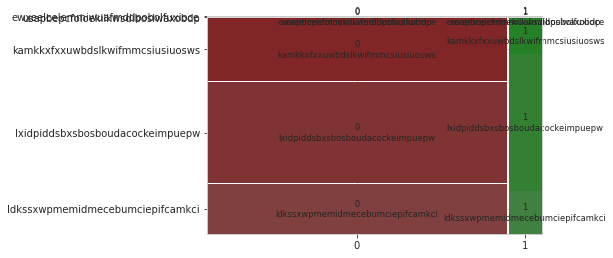

In [318]:

thisPlot = merge2[["id","churn","origin_up"]] 
mosaic(thisPlot, ['churn','origin_up'])
plt.show()

In [281]:

if not os.path.exists(os.path.join("..", "processed_data")):
 os.makedirs(os.path.join("..", "processed_data"))


Overall impression: There seems to be some minor differences between the two categories.  However, no glaring differences.

Way forward: The missing, and outliers will be taken care of in the pre-processing step.

# Final preparation of the dataset

In [315]:
finalDateset = pd.merge(left=merge1, right=merge2, how='left', on='id')

finalDateset.shape 

(193002, 34)

In [ ]:
finalDateset.head(5)

In [320]:
finalDateset_DIR = os.path.join("..", "processed_data", "merge1_data.pkl")


In [321]:
pd.to_pickle(finalDateset, finalDateset_DIR)